In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
#import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import recall_score, precision_score, classification_report,accuracy_score,confusion_matrix, roc_curve, auc, roc_curve,accuracy_score,plot_confusion_matrix
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from scipy import ndimage
import seaborn as sns

In [2]:
patientType = pd.read_csv('GeneExpressionDataset/actual.csv')
print(patientType.columns)

Index(['patient', 'cancer'], dtype='object')


In [3]:
patientType.head()

,patient,cancer
0,1,ALL
1,2,ALL
2,3,ALL
3,4,ALL
4,5,ALL


In [4]:
trainFull = pd.read_csv('GeneExpressionDataset/data_set_ALL_AML_train.csv')
print(trainFull.columns)

Index(['Gene Description', 'Gene Accession Number', '1', 'call', '2', 'call.1',
       '3', 'call.2', '4', 'call.3', '5', 'call.4', '6', 'call.5', '7',
       'call.6', '8', 'call.7', '9', 'call.8', '10', 'call.9', '11', 'call.10',
       '12', 'call.11', '13', 'call.12', '14', 'call.13', '15', 'call.14',
       '16', 'call.15', '17', 'call.16', '18', 'call.17', '19', 'call.18',
       '20', 'call.19', '21', 'call.20', '22', 'call.21', '23', 'call.22',
       '24', 'call.23', '25', 'call.24', '26', 'call.25', '27', 'call.26',
       '34', 'call.27', '35', 'call.28', '36', 'call.29', '37', 'call.30',
       '38', 'call.31', '28', 'call.32', '29', 'call.33', '30', 'call.34',
       '31', 'call.35', '32', 'call.36', '33', 'call.37'],
      dtype='object')


In [5]:
trainFull.head()

,Gene Description,Gene Accession Number,1,call,2,call.1,3,call.2,4,call.3,...,29,call.33,30,call.34,31,call.35,32,call.36,33,call.37
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,A,-139,A,-76,A,-135,A,...,15,A,-318,A,-32,A,-124,A,-135,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,A,-73,A,-49,A,-114,A,...,-114,A,-192,A,-49,A,-79,A,-186,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,A,-1,A,-307,A,265,A,...,2,A,-95,A,49,A,-37,A,-70,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,A,283,A,309,A,12,A,...,193,A,312,A,230,P,330,A,337,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,A,-264,A,-376,A,-419,A,...,-51,A,-139,A,-367,A,-188,A,-407,A


In [6]:
testFull = pd.read_csv('GeneExpressionDataset/data_set_ALL_AML_independent.csv')
print(testFull.columns)

Index(['Gene Description', 'Gene Accession Number', '39', 'call', '40',
       'call.1', '42', 'call.2', '47', 'call.3', '48', 'call.4', '49',
       'call.5', '41', 'call.6', '43', 'call.7', '44', 'call.8', '45',
       'call.9', '46', 'call.10', '70', 'call.11', '71', 'call.12', '72',
       'call.13', '68', 'call.14', '69', 'call.15', '67', 'call.16', '55',
       'call.17', '56', 'call.18', '59', 'call.19', '52', 'call.20', '53',
       'call.21', '51', 'call.22', '50', 'call.23', '54', 'call.24', '57',
       'call.25', '58', 'call.26', '60', 'call.27', '61', 'call.28', '65',
       'call.29', '66', 'call.30', '63', 'call.31', '64', 'call.32', '62',
       'call.33'],
      dtype='object')


In [7]:
testFull.head()

,Gene Description,Gene Accession Number,39,call,40,call.1,42,call.2,47,call.3,...,65,call.29,66,call.30,63,call.31,64,call.32,62,call.33
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-342,A,-87,A,22,A,-243,A,...,-62,A,-58,A,-161,A,-48,A,-176,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-200,A,-248,A,-153,A,-218,A,...,-198,A,-217,A,-215,A,-531,A,-284,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,41,A,262,A,17,A,-163,A,...,-5,A,63,A,-46,A,-124,A,-81,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,328,A,295,A,276,A,182,A,...,141,A,95,A,146,A,431,A,9,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-224,A,-226,A,-211,A,-289,A,...,-256,A,-191,A,-172,A,-496,A,-294,A


In [8]:
#drop 'call' columns
cols = [col for col in testFull.columns if 'call' in col]
test = testFull.drop(cols, 1)
cols = [col for col in trainFull.columns if 'call' in col]
train = trainFull.drop(cols, 1)

In [9]:
#Join all the data
patients = [str(i) for i in range(1, 73, 1)]
df_all = pd.concat([train, test], axis = 1)[patients]

In [10]:
#transpose rows and columns
df_all = df_all.T

In [11]:
df_all.info();

<class 'pandas.core.frame.DataFrame'>
Index: 72 entries, 1 to 72
Columns: 7129 entries, 0 to 7128
dtypes: int64(7129)
memory usage: 3.9+ MB


In [12]:
df_all["patient"] = pd.to_numeric(patients)
patientType["cancer"]= pd.get_dummies(patientType.cancer, drop_first=True)
# add the cancer column to train data

Data = pd.merge(df_all, patientType, on="patient")

In [13]:
Data

,0,1,2,3,4,5,6,7,8,9,...,7121,7122,7123,7124,7125,7126,7127,7128,patient,cancer
0,-214,-153,-58,88,-295,-558,199,-176,252,206,...,-125,389,-37,793,329,36,191,-37,1,0
1,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,-36,442,-17,782,295,11,76,-14,2,0
2,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,33,168,52,1138,777,41,228,-41,3,0
3,-135,-114,265,12,-419,-585,158,-253,49,31,...,218,174,-110,627,170,-50,126,-91,4,0
4,-106,-125,-76,168,-230,-284,4,-122,70,252,...,57,504,-26,250,314,14,56,-25,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,-154,-136,49,180,-257,-273,141,-123,52,878,...,13,1075,-45,524,249,40,-68,-1,68,0
68,-79,-118,-30,68,-110,-264,-28,-61,40,-217,...,-34,738,11,742,234,72,109,-30,69,0
69,-55,-44,12,129,-108,-301,-222,-133,136,320,...,35,241,-66,320,174,-4,176,40,70,0
70,-59,-114,23,146,-171,-227,-73,-126,-6,149,...,-38,201,-55,348,208,0,74,-12,71,0


In [14]:
Data['cancer'].value_counts()

0    47
1    25
Name: cancer, dtype: int64

In [15]:
TryData = pd.DataFrame(Data, columns=[4679, 6180, 5551, 4317, 1684, 2641, 1961, 5937, 1703, 6776, 1881, 1673, 1778, 2401, 6200, 4935, 6223, 6208, 2287, 6805])

C:\Users\isaac\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Class Distributions \n (0: AML || 1: ALL)')

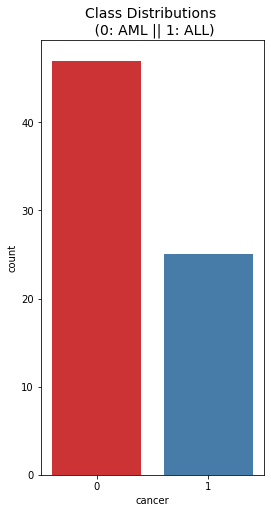

In [16]:
plt.figure(figsize=(4,8))
colors = ["AML", "ALL"]
sns.countplot('cancer', data=Data, palette = "Set1")
plt.title('Class Distributions \n (0: AML || 1: ALL)', fontsize=14)

In [17]:
amlMeans = Data[Data['cancer'] == 1].mean()

In [18]:
allMeans = Data[Data['cancer'] == 0].mean()

In [19]:
amlMeans

0          -99.28
1         -183.40
2           -2.16
3          233.12
4         -280.68
            ...  
7126         1.64
7127       715.00
7128       -28.48
patient     47.16
cancer       1.00
Length: 7131, dtype: float64

In [20]:
allMeans

0         -122.723404
1         -147.744681
2          -11.212766
3          166.063830
4         -238.744681
              ...    
7126        13.787234
7127       283.744681
7128       -31.680851
patient     30.829787
cancer       0.000000
Length: 7131, dtype: float64

In [21]:
meansDiff = amlMeans - allMeans

In [22]:
meansDiff

0           23.443404
1          -35.655319
2            9.052766
3           67.056170
4          -41.935319
              ...    
7126       -12.147234
7127       431.255319
7128         3.200851
patient     16.330213
cancer       1.000000
Length: 7131, dtype: float64

In [23]:
#meansDiff.to_csv('meanDiff.csv')

In [24]:
X = Data.drop(['patient', 'cancer'], axis=1)
y = Data.cancer

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB



from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

# Initial model selection process
models = []

models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(("BNB", BernoulliNB()))

In [26]:
# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = Data.cancer, random_state=0)

In [27]:
names = []
scores = []

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)

tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

  Name     Score
0  KNN  1.000000
1   DT  0.944444
2  GNB  1.000000
3  BNB  0.944444


In [28]:
strat_k_fold = StratifiedKFold(n_splits=5, random_state=10, shuffle = True)

names = []
scores = []

for name, model in models:
    
    score = cross_val_score(model, X, y, cv=strat_k_fold, scoring='accuracy').mean()
    names.append(name)
    scores.append(score)

kf_cross_val = pd.DataFrame({'Name': names, 'Score': scores})
print(kf_cross_val)

  Name     Score
0  KNN  0.945714
1   DT  0.791429
2  GNB  0.972381
3  BNB  0.902857


In [29]:
# Initial model selection process
models = []

models.append(('KNN', KNeighborsClassifier(n_neighbors = 1)))
models.append(('DT', DecisionTreeClassifier(max_depth = 6)))
models.append(('GNB', GaussianNB()))
models.append(("BNB", BernoulliNB()))


strat_k_fold = StratifiedKFold(n_splits=5, random_state=10, shuffle = True)

names = []
scores = []

for name, model in models:
    
    score = cross_val_score(model, X, y, cv=strat_k_fold, scoring='accuracy').mean()
    names.append(name)
    scores.append(score)

kf_cross_val = pd.DataFrame({'Name': names, 'Score': scores})
print(kf_cross_val)

  Name     Score
0  KNN  0.944762
1   DT  0.763810
2  GNB  0.972381
3  BNB  0.902857


In [30]:
# Initial model selection process
models = []

models.append(('DT-2', DecisionTreeClassifier(max_depth = 2)))
models.append(('DT-3', DecisionTreeClassifier(max_depth = 3)))
models.append(('DT-4', DecisionTreeClassifier(max_depth = 4)))
models.append(('DT-5', DecisionTreeClassifier(max_depth = 5)))
models.append(('DT-6', DecisionTreeClassifier(max_depth = 6)))
models.append(('DT-7', DecisionTreeClassifier(max_depth = 7)))
models.append(('DT-8', DecisionTreeClassifier(max_depth = 8)))
models.append(('DT-9', DecisionTreeClassifier(max_depth = 9)))
models.append(('DT-10', DecisionTreeClassifier(max_depth = 10)))
models.append(('DT-11', DecisionTreeClassifier(max_depth = 11)))
models.append(('DT-12', DecisionTreeClassifier(max_depth = 12)))


strat_k_fold = StratifiedKFold(n_splits=5, random_state=10, shuffle = True)

names = []
scores = []

for name, model in models:
    
    score = cross_val_score(model, X, y, cv=strat_k_fold, scoring='accuracy').mean()
    names.append(name)
    scores.append(score)

kf_cross_val = pd.DataFrame({'Name': names, 'Score': scores})
print(kf_cross_val)

     Name     Score
0    DT-2  0.777143
1    DT-3  0.820000
2    DT-4  0.792381
3    DT-5  0.820952
4    DT-6  0.820952
5    DT-7  0.748571
6    DT-8  0.804762
7    DT-9  0.750476
8   DT-10  0.764762
9   DT-11  0.792381
10  DT-12  0.792381


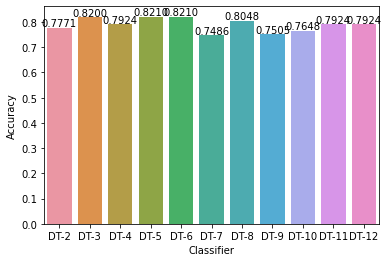

In [31]:
axis = sns.barplot(x = 'Name', y = 'Score', data = kf_cross_val)
axis.set(xlabel='Classifier', ylabel='Accuracy')

for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

In [32]:
# Initial model selection process
models = []

models.append(('KNN-1', KNeighborsClassifier(n_neighbors = 1)))
models.append(('KNN-2', KNeighborsClassifier(n_neighbors = 2)))
models.append(('KNN-3', KNeighborsClassifier(n_neighbors = 3)))
models.append(('KNN-4', KNeighborsClassifier(n_neighbors = 4)))
models.append(('KNN-5', KNeighborsClassifier(n_neighbors = 5)))
models.append(('KNN-6', KNeighborsClassifier(n_neighbors = 6)))
models.append(('KNN-7', KNeighborsClassifier(n_neighbors = 7)))
models.append(('KNN-8', KNeighborsClassifier(n_neighbors = 8)))
models.append(('KNN-10', KNeighborsClassifier(n_neighbors = 10)))
models.append(('KNN-12', KNeighborsClassifier(n_neighbors = 12)))
models.append(('KNN-13', KNeighborsClassifier(n_neighbors = 13)))
models.append(('KNN-15', KNeighborsClassifier(n_neighbors = 15)))
models.append(('KNN-18', KNeighborsClassifier(n_neighbors = 18)))
models.append(('KNN-20', KNeighborsClassifier(n_neighbors = 20)))

strat_k_fold = StratifiedKFold(n_splits=5, random_state=10, shuffle = True)

names = []
scores = []

for name, model in models:
    
    score = cross_val_score(model, X, y, cv=strat_k_fold, scoring='accuracy').mean()
    names.append(name)
    scores.append(score)

kf_cross_val = pd.DataFrame({'Name': names, 'Score': scores})
print(kf_cross_val)

      Name     Score
0    KNN-1  0.944762
1    KNN-2  0.917143
2    KNN-3  0.917143
3    KNN-4  0.889524
4    KNN-5  0.945714
5    KNN-6  0.890476
6    KNN-7  0.932381
7    KNN-8  0.835238
8   KNN-10  0.849524
9   KNN-12  0.820952
10  KNN-13  0.849524
11  KNN-15  0.806667
12  KNN-18  0.721905
13  KNN-20  0.694286


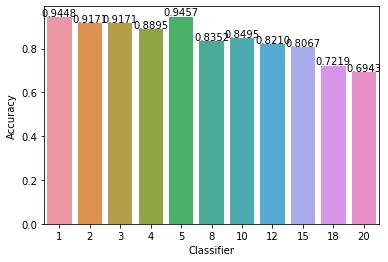

In [33]:
models = []

models.append(('1', KNeighborsClassifier(n_neighbors = 1)))
models.append(('2', KNeighborsClassifier(n_neighbors = 2)))
models.append(('3', KNeighborsClassifier(n_neighbors = 3)))
models.append(('4', KNeighborsClassifier(n_neighbors = 4)))
models.append(('5', KNeighborsClassifier(n_neighbors = 5)))
models.append(('8', KNeighborsClassifier(n_neighbors = 8)))
models.append(('10', KNeighborsClassifier(n_neighbors = 10)))
models.append(('12', KNeighborsClassifier(n_neighbors = 12)))
models.append(('15', KNeighborsClassifier(n_neighbors = 15)))
models.append(('18', KNeighborsClassifier(n_neighbors = 18)))
models.append(('20', KNeighborsClassifier(n_neighbors = 20)))

strat_k_fold = StratifiedKFold(n_splits=5, random_state=10, shuffle = True)

names = []
scores = []

for name, model in models:
    
    score = cross_val_score(model, X, y, cv=strat_k_fold, scoring='accuracy').mean()
    names.append(name)
    scores.append(score)

kf_cross_val = pd.DataFrame({'Name': names, 'Score': scores})

axis = sns.barplot(x = 'Name', y = 'Score', data = kf_cross_val)
axis.set(xlabel='Classifier', ylabel='Accuracy')

for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

In [34]:
from sklearn.pipeline import Pipeline

knn_pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_jobs=-1))])

knn_params = {'knn__n_neighbors': range(1, 20)}

knn_grid = GridSearchCV(knn_pipe, knn_params,
                        cv=10, n_jobs=-1, verbose=True)

knn_grid.fit(X_train, y_train)

knn_grid.best_params_, knn_grid.best_score_

Fitting 10 folds for each of 19 candidates, totalling 190 fits


({'knn__n_neighbors': 3}, 0.8300000000000001)

In [35]:
from sklearn.model_selection import GridSearchCV, cross_val_score

tree = DecisionTreeClassifier(random_state=17)

tree.fit(X, y)

tree_params = {'max_depth': range(1,11),
               'max_features': range(1,19),
                'criterion': ['gini','entropy']}

tree_grid = GridSearchCV(tree, tree_params, cv=5, n_jobs=-1, verbose=True)

tree_grid.fit(X, y)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=17), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 11),
                         'max_features': range(1, 19)},
             verbose=True)

In [36]:
print (f"Best parameters are {tree_grid.best_params_}") 

Best parameters are {'criterion': 'gini', 'max_depth': 3, 'max_features': 14}


In [37]:
tree_grid.best_score_ 

0.9323809523809524

In [38]:
from sklearn.tree import DecisionTreeClassifier
import pydotplus #pip install pydotplus
from sklearn.tree import export_graphviz

# Let’s write an auxiliary function that will return grid for further visualization.

def tree_graph_to_png(tree, feature_names, png_file_to_save):
    tree_str = export_graphviz(tree, feature_names=feature_names, 
                                     filled=True, out_file=None)
    graph = pydotplus.graph_from_dot_data(tree_str)  
    graph.write_png(png_file_to_save)

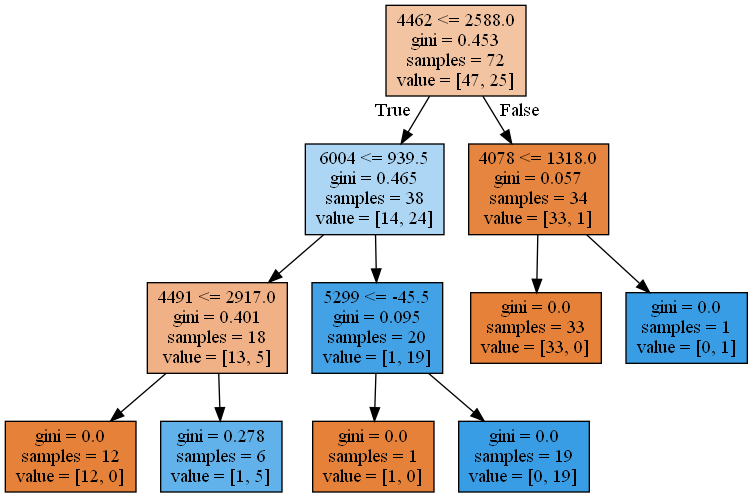

In [39]:
#treeBest = DecisionTreeClassifier(max_depth = 3, max_features = 14, random_state=17)

tree_graph_to_png(tree=tree_grid.best_estimator_, feature_names=X.columns, png_file_to_save='optimalDT.png')


from IPython.display import Image
from IPython.core.display import HTML 
PATH = "optimalDT.png"
Image(filename = PATH , width=600, height=600)

In [40]:
# Initial model selection process
models = []

models.append(('DT-2', DecisionTreeClassifier(max_depth = 2)))
models.append(('DT-3', DecisionTreeClassifier(max_depth = 3)))
models.append(('DT-4', DecisionTreeClassifier(max_depth = 4)))
models.append(('DT-5', DecisionTreeClassifier(max_depth = 5)))
models.append(('DT-6', DecisionTreeClassifier(max_depth = 6)))
models.append(('DT-7', DecisionTreeClassifier(max_depth = 7)))
models.append(('DT-8', DecisionTreeClassifier(max_depth = 8)))
models.append(('DT-9', DecisionTreeClassifier(max_depth = 9)))
models.append(('DT-10', DecisionTreeClassifier(max_depth = 10)))
models.append(('DT-11', DecisionTreeClassifier(max_depth = 11)))
models.append(('DT-12', DecisionTreeClassifier(max_depth = 12)))


strat_k_fold = StratifiedKFold(n_splits=5, random_state=10, shuffle = True)

names = []
scores = []

for name, model in models:
    
    score = cross_val_score(model, X, y, cv=strat_k_fold, scoring='accuracy').mean()
    names.append(name)
    scores.append(score)

kf_cross_val = pd.DataFrame({'Name': names, 'Score': scores})
print(kf_cross_val)

     Name     Score
0    DT-2  0.777143
1    DT-3  0.819048
2    DT-4  0.791429
3    DT-5  0.764762
4    DT-6  0.779048
5    DT-7  0.804762
6    DT-8  0.764762
7    DT-9  0.778095
8   DT-10  0.806667
9   DT-11  0.778095
10  DT-12  0.736190


In [41]:
# Initial model selection process
models = []

models.append(('DT-2', DecisionTreeClassifier(max_depth = 2, max_features = 14)))
models.append(('DT-3', DecisionTreeClassifier(max_depth = 3, max_features = 14)))
models.append(('DT-4', DecisionTreeClassifier(max_depth = 4, max_features = 14)))
models.append(('DT-5', DecisionTreeClassifier(max_depth = 5, max_features = 14)))
models.append(('DT-6', DecisionTreeClassifier(max_depth = 6, max_features = 14)))
models.append(('DT-7', DecisionTreeClassifier(max_depth = 7, max_features = 14)))
models.append(('DT-8', DecisionTreeClassifier(max_depth = 8, max_features = 14)))
models.append(('DT-9', DecisionTreeClassifier(max_depth = 9, max_features = 14)))
models.append(('DT-10', DecisionTreeClassifier(max_depth = 10, max_features = 14)))
models.append(('DT-11', DecisionTreeClassifier(max_depth = 11, max_features = 14)))
models.append(('DT-12', DecisionTreeClassifier(max_depth = 12, max_features = 14)))


strat_k_fold = StratifiedKFold(n_splits=5, random_state=10, shuffle = True)

names = []
scores = []

for name, model in models:
    
    score = cross_val_score(model, X, y, cv=strat_k_fold, scoring='accuracy').mean()
    names.append(name)
    scores.append(score)

kf_cross_val = pd.DataFrame({'Name': names, 'Score': scores})
print(kf_cross_val)

     Name     Score
0    DT-2  0.735238
1    DT-3  0.709524
2    DT-4  0.598095
3    DT-5  0.765714
4    DT-6  0.679048
5    DT-7  0.722857
6    DT-8  0.694286
7    DT-9  0.707619
8   DT-10  0.737143
9   DT-11  0.806667
10  DT-12  0.710476


In [52]:
Top5 = pd.DataFrame(Data, columns=[4679, 6180, 5551, 4317, 1684, 1881, 1673, 1778, 2401, 6200])
Top10 = pd.DataFrame(Data, columns=[4679, 6180, 5551, 4317, 1684, 2641, 1961, 5937, 1703, 6776, 1881, 1673, 1778, 2401, 6200, 4935, 6223, 6208, 2287, 6805])

In [53]:
from sklearn.model_selection import GridSearchCV, cross_val_score

tree = DecisionTreeClassifier(random_state=17)

tree.fit(Top5, y)

tree_params = {'max_depth': range(1,10),
               'max_features': range(1,10),
                'criterion': ['gini','entropy']}

tree_grid = GridSearchCV(tree, tree_params, cv=5, n_jobs=-1, verbose=True)

tree_grid.fit(Top5, y)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=17), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'max_features': range(1, 10)},
             verbose=True)

In [54]:
print (f"Best parameters are {tree_grid.best_params_}") 

Best parameters are {'criterion': 'gini', 'max_depth': 2, 'max_features': 1}


In [55]:
tree_grid.best_score_ 

0.959047619047619

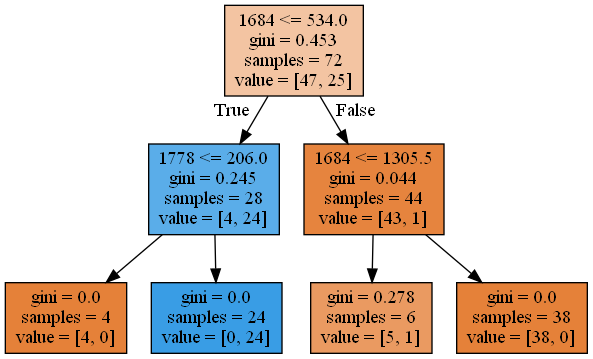

In [56]:
#treeBest = DecisionTreeClassifier(max_depth = 3, max_features = 14, random_state=17)

tree_graph_to_png(tree=tree_grid.best_estimator_, feature_names=Top5.columns, png_file_to_save='optimalDTtop5.png')


from IPython.display import Image
from IPython.core.display import HTML 
PATH = "optimalDTtop5.png"
Image(filename = PATH , width=600, height=600)

In [57]:
from sklearn.model_selection import GridSearchCV, cross_val_score

tree = DecisionTreeClassifier(random_state=17)

tree.fit(Top10, y)

tree_params = {'max_depth': range(1,10),
               'max_features': range(1,20),
                'criterion': ['gini','entropy']}

tree_grid = GridSearchCV(tree, tree_params, cv=5, n_jobs=-1, verbose=True)

tree_grid.fit(Top10, y)

Fitting 5 folds for each of 342 candidates, totalling 1710 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=17), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'max_features': range(1, 20)},
             verbose=True)

In [58]:
print (f"Best parameters are {tree_grid.best_params_}") 

Best parameters are {'criterion': 'gini', 'max_depth': 2, 'max_features': 7}


In [59]:
tree_grid.best_score_ 

0.9323809523809524

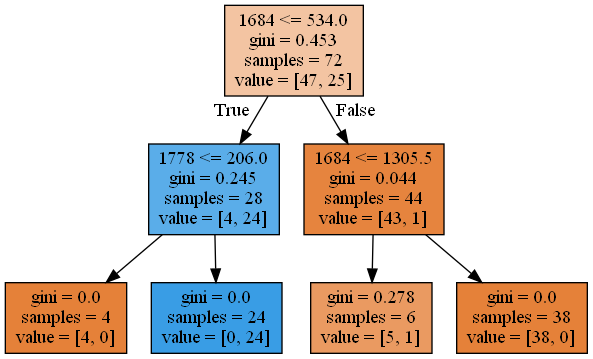

In [60]:
#treeBest = DecisionTreeClassifier(max_depth = 3, max_features = 14, random_state=17)

tree_graph_to_png(tree=tree_grid.best_estimator_, feature_names=Top10.columns, png_file_to_save='optimalDTtop10.png')


from IPython.display import Image
from IPython.core.display import HTML 
PATH = "optimalDTtop5.png"
Image(filename = PATH , width=600, height=600)

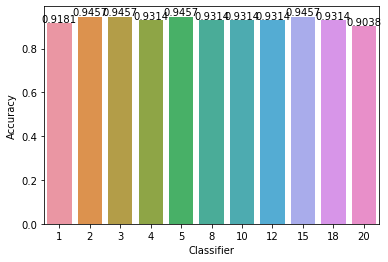

In [61]:
models = []

models.append(('1', KNeighborsClassifier(n_neighbors = 1)))
models.append(('2', KNeighborsClassifier(n_neighbors = 2)))
models.append(('3', KNeighborsClassifier(n_neighbors = 3)))
models.append(('4', KNeighborsClassifier(n_neighbors = 4)))
models.append(('5', KNeighborsClassifier(n_neighbors = 5)))
models.append(('8', KNeighborsClassifier(n_neighbors = 8)))
models.append(('10', KNeighborsClassifier(n_neighbors = 10)))
models.append(('12', KNeighborsClassifier(n_neighbors = 12)))
models.append(('15', KNeighborsClassifier(n_neighbors = 15)))
models.append(('18', KNeighborsClassifier(n_neighbors = 18)))
models.append(('20', KNeighborsClassifier(n_neighbors = 20)))

strat_k_fold = StratifiedKFold(n_splits=5, random_state=10, shuffle = True)

names = []
scores = []

for name, model in models:
    
    score = cross_val_score(model, Top5, y, cv=strat_k_fold, scoring='accuracy').mean()
    names.append(name)
    scores.append(score)

kf_cross_val = pd.DataFrame({'Name': names, 'Score': scores})

axis = sns.barplot(x = 'Name', y = 'Score', data = kf_cross_val)
axis.set(xlabel='Classifier', ylabel='Accuracy')

for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

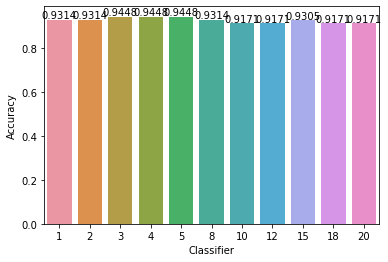

In [62]:
models = []

models.append(('1', KNeighborsClassifier(n_neighbors = 1)))
models.append(('2', KNeighborsClassifier(n_neighbors = 2)))
models.append(('3', KNeighborsClassifier(n_neighbors = 3)))
models.append(('4', KNeighborsClassifier(n_neighbors = 4)))
models.append(('5', KNeighborsClassifier(n_neighbors = 5)))
models.append(('8', KNeighborsClassifier(n_neighbors = 8)))
models.append(('10', KNeighborsClassifier(n_neighbors = 10)))
models.append(('12', KNeighborsClassifier(n_neighbors = 12)))
models.append(('15', KNeighborsClassifier(n_neighbors = 15)))
models.append(('18', KNeighborsClassifier(n_neighbors = 18)))
models.append(('20', KNeighborsClassifier(n_neighbors = 20)))

strat_k_fold = StratifiedKFold(n_splits=5, random_state=10, shuffle = True)

names = []
scores = []

for name, model in models:
    
    score = cross_val_score(model, Top10, y, cv=strat_k_fold, scoring='accuracy').mean()
    names.append(name)
    scores.append(score)

kf_cross_val = pd.DataFrame({'Name': names, 'Score': scores})

axis = sns.barplot(x = 'Name', y = 'Score', data = kf_cross_val)
axis.set(xlabel='Classifier', ylabel='Accuracy')

for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

In [64]:
models = []

models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(("BNB", BernoulliNB()))

strat_k_fold = StratifiedKFold(n_splits=5, random_state=10, shuffle = True)

names = []
scores = []

for name, model in models:
    
    score = cross_val_score(model, Top5, y, cv=strat_k_fold, scoring='accuracy').mean()
    names.append(name)
    scores.append(score)

kf_cross_val = pd.DataFrame({'Name': names, 'Score': scores})
print(kf_cross_val)

  Name     Score
0  KNN  0.945714
1   DT  0.914286
2  GNB  0.971429
3  BNB  0.845714


In [65]:
models = []

models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(("BNB", BernoulliNB()))

strat_k_fold = StratifiedKFold(n_splits=5, random_state=10, shuffle = True)

names = []
scores = []

for name, model in models:
    
    score = cross_val_score(model, Top10, y, cv=strat_k_fold, scoring='accuracy').mean()
    names.append(name)
    scores.append(score)

kf_cross_val = pd.DataFrame({'Name': names, 'Score': scores})
print(kf_cross_val)

  Name     Score
0  KNN  0.944762
1   DT  0.873333
2  GNB  0.958095
3  BNB  0.902857
